In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Dado uma base de dados que contém resultados de diversos jogos de Counter Strike, com variáveis coletadas nos jogos e os resultados de quem ganhou cada round, vamos criar um modelo que nos permita prever quem irá ganhar um round de um jogo.

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')

### Estudando o Dataset

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [5]:
# Aparentemente não temos colunas NaN no dataset
# Temos 122.410 linhas no dataset e 94 colunas de variáveis numéricas

### Verificando se temos dados nulos

In [6]:
df_nan = pd.DataFrame(df.isna().sum()).reset_index().rename(columns = {0: 'total_nan', 'index': 'coluna'})

In [7]:
df_nan

,coluna,total_nan
0,time_left,0
1,ct_score,0
2,t_score,0
3,map,0
4,bomb_planted,0
...,...,...
92,ct_grenade_molotovgrenade,0
93,t_grenade_molotovgrenade,0
94,ct_grenade_decoygrenade,0
95,t_grenade_decoygrenade,0


In [8]:
df_nan[df_nan['total_nan'] > 0]

,coluna,total_nan


In [9]:
# De fato, não há dados nulos

### Estudando as variáveis categóricas

In [10]:
cols = df.dtypes.reset_index().rename(columns={'index': 'coluna', 0: 'tipo'})
categ_cols = cols[cols['tipo'] == object]
cont_cols = cols[cols['tipo'] != object]
categ_cols

,coluna,tipo
3,map,object
96,round_winner,object


In [11]:
# Possuímos duas variáveis categóricas: o vencedor do round e o mapa onde estava sendo jogado.

In [12]:
cont_cols

,coluna,tipo
0,time_left,float64
1,ct_score,float64
2,t_score,float64
4,bomb_planted,bool
5,ct_health,float64
...,...,...
91,t_grenade_incendiarygrenade,float64
92,ct_grenade_molotovgrenade,float64
93,t_grenade_molotovgrenade,float64
94,ct_grenade_decoygrenade,float64


In [13]:
cont_cols['tipo'].unique()

array([dtype('float64'), dtype('bool')], dtype=object)

In [14]:
# Nas variáveis contínuas, podemos perceber que temos um valor booleano

In [15]:
cont_cols[cont_cols['tipo'] == bool]

,coluna,tipo
4,bomb_planted,bool


In [16]:
# Para as contínuas, expecificamente, não é interessante ter uma variável booleana, principalmente
# quando formos aplicar o modelo. Então vamos transformá-la em numérica.

In [17]:
df['bomb_planted'] = df['bomb_planted'].astype(int)

In [18]:
df['bomb_planted']

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 122410, dtype: int32

##### Temos 2 colunas categóricas no dataset, o mapa que estava sendo jogado e o resultado de quem ganhou.

In [19]:
df['round_winner'].unique()

array(['CT', 'T'], dtype=object)

##### A coluna round winner mostra quem ganhou o jogo, CT representando Counter Terrorists e T representando Terrorists, que são os dois times jogados no jogo.

### Verificando outliers nas variáveis contínuas

<AxesSubplot:>

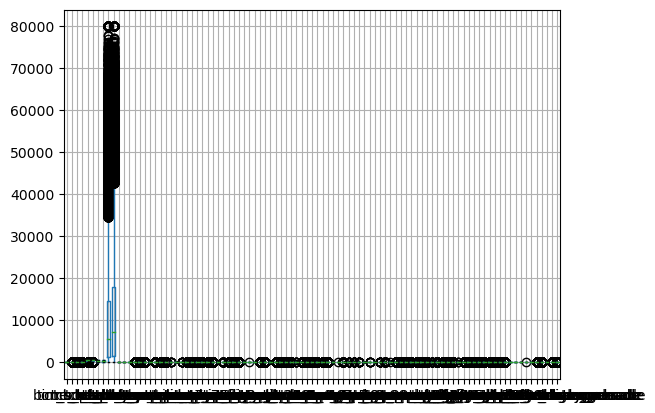

In [20]:
df.boxplot()

Visualmente falando não fica muito boa essa verificação com o boxplot. Vamos então usar outro método:

In [21]:
nomes_colunas = []
qtt_outliers = []

for i in cont_cols['coluna']:
    
    contador = 0
    
    q1 = np.quantile(df[i], 0.25) # primeiro quartil
    q3 = np.quantile(df[i], 0.75) # terceiro quartil
    li = q1 - 1.5*(q3-q1) # limite inferior
    ls = q3 + 1.5*(q3-q1) # limite superior
    
    for j in df.index:
        if li <= df[i][j] <= ls:
            pass
        else:
            contador += 1
    
    perc_outliers = (contador / df[i].count())*100 # porcentagem da quantidade de outliers nessa coluna
    
    nomes_colunas.append(i)
    qtt_outliers.append(perc_outliers)
    #df = df.drop(j, axis=0) # comando para remover os outliers

In [22]:
outliers = pd.DataFrame()
outliers['coluna'] = nomes_colunas
outliers['perc_outliers'] = qtt_outliers
outliers[outliers['perc_outliers'] > 10] # filtrando as colunas que possuem mais do que 10% de outliers

,coluna,perc_outliers
3,bomb_planted,11.178825
13,ct_players_alive,12.626419
14,t_players_alive,11.955723
15,ct_weapon_ak47,21.308717
17,ct_weapon_aug,10.071073
23,ct_weapon_cz75auto,12.320072
49,ct_weapon_mp9,10.812025
63,ct_weapon_sg553,18.546687
64,t_weapon_sg553,10.758925
72,t_weapon_deagle,23.721918


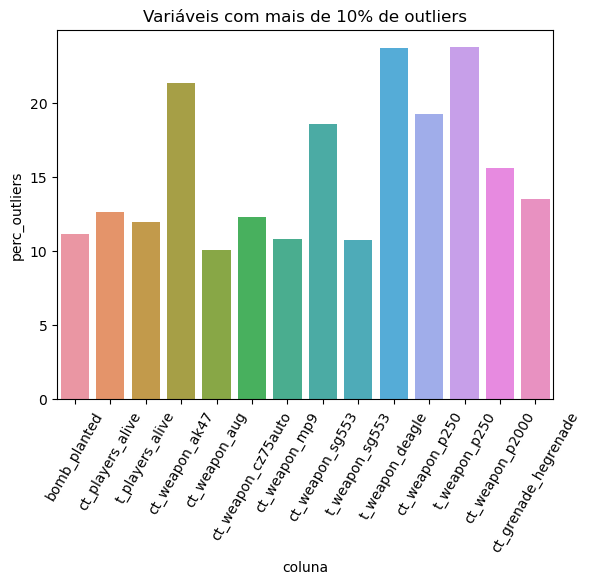

In [23]:
sns.barplot(x='coluna', y='perc_outliers', data=outliers[outliers['perc_outliers'] > 10])
plt.xticks(rotation=60)
plt.title('Variáveis com mais de 10% de outliers')
plt.show()

Pelo que podemos ver, as variáveis possuem uma porcentagem relativamente baixa de outliers. O valor máximo que algumas chegam a ter é por volta de 20%.

### Transformando a coluna 'round_winner' em numérica. 

Para isso, vamos criar um dataset novo para não interferir no original, já que o pré-processamento nele só se dará após a divisão entre treino e teste. Iremos fazer essa transformação apenas para ver a correlação entre a a variável 'round_winner' com algumas outras variáveis.

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df = df.copy()
new_df['round_winner'] = le.fit_transform(df['round_winner'])

In [25]:
new_df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,de_dust2,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,de_dust2,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,de_dust2,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,de_train,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,de_train,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


#### CT = 0 e T = 1

### Vamos ver a correlação entre os vencedores e a quantidade de vida, armadura e dinheiro

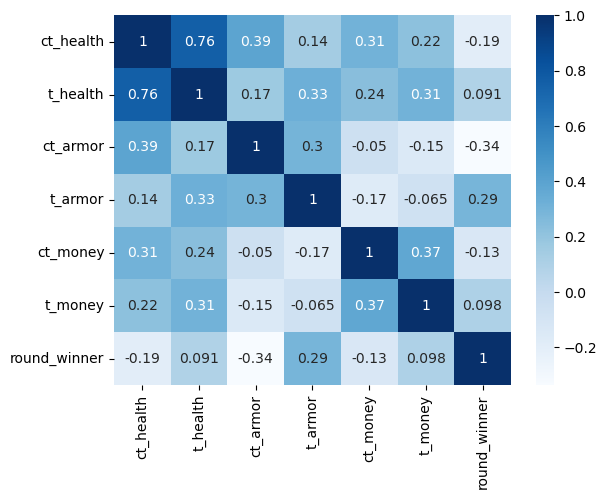

In [26]:
corr = new_df[['ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'round_winner']].corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

Aparentemente, existe uma correlação positiva entre a quantidade de armadura dos terroristas e as vitórias dos rounds. Isso faz sentido considerando que a equipe dos terroristas normalmente precisa resistir às investidas dos contra-terroristas depois de plantar a bomba. Então, por assumirem uma posição defensiva com mais frequência, a armadura acaba fazendo diferença. Podemos dizer então que é uma característica que possui certa relevância, mas por si só não é o suficiente para determinar se há aí uma relação de causalidade.

&nbsp;

Por outro lado, os contra-terroristas já possuem uma correlação negativa entre suas armaduras e as vitórias, isso nos mostra que existem outros fatores que são mais importantes para garantir as vitórias. Por exemplo, os terroristas podem vencer o round eliminando todo o time adversário ou plantando a bomba e garantindo que ela não seja desarmada até o momento da explosão. Já para os contra-terroristas, eles só vencem ao eliminar os adversários apenas se a bomba não tiver sido plantada. Caso tenha sido, a única maneira de vencerem é desarmando-a. Então enquanto os terroristas possuem uma estratégia mais defensiva e se beneficiam com a armadura, os contra-terroristas possuem estratégias mais ofensivas que vão depender de outros fatores.

### Dividindo o conjunto entre treino e teste
Agora vamos preparar os dados para aplicá-los em um modelo

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('round_winner', axis=1) # Todo o dataframe menos a coluna da variável resposta
y = df['round_winner'] # Somente a coluna da variável resposta

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Vamos primeiro realizar o pré-processamento dos dados

In [29]:
from sklearn.preprocessing import LabelEncoder

le_features = LabelEncoder()

# No conjunto de features, apenas a coluna map é categórica

# Aplicando o label encoder em X_train
X_train['map'] = le_features.fit_transform(X_train['map'])

# Aplicando o label encoder em X_test
X_test['map'] = le_features.transform(X_test['map'])


In [30]:
# Agora aplicando no target 'round_winner'
le_target = LabelEncoder()

y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

### Padronizando as entradas do modelo

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled # retornou como um array

array([[-1.18271918,  1.31487825,  1.70421317, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.851754  ,  1.7326225 ,  0.04557825, ..., -0.21118431,
        -0.16466055, -0.15653985],
       [-0.05427852,  2.15036674,  1.70421317, ...,  0.99192555,
        -0.16466055, -0.15653985],
       ...,
       [-0.42069114, -0.56497085, -0.78373921, ...,  1.59348047,
         5.69041524, -0.15653985],
       [ 0.31323609, -1.40045934, -1.40572731, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.78820574, -0.56497085,  1.08222507, ..., -0.21118431,
        -0.16466055,  5.9630747 ]])

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=(X_train.columns)) #Transformando o array de volta em dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, columns=(X_test.columns))

In [33]:
X_train_scaled

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,-1.182719,1.314878,1.704213,-0.788317,2.819237,-0.559983,-2.303983,0.408514,-1.223316,0.807595,...,-0.480810,-1.036379,0.264351,-0.890306,0.683771,-0.138338,-0.210652,-0.812739,-0.164661,-0.156540
1,-0.851754,1.732622,0.045578,-0.269375,-0.354706,-0.847226,-1.361272,-0.082883,0.249271,-0.845798,...,0.083742,1.193594,-0.886070,-0.343556,-0.001645,6.833950,-0.210652,-0.211184,-0.164661,-0.156540
2,-0.054279,2.150367,1.704213,1.806392,-0.354706,-0.234946,0.659842,0.502114,1.137408,1.881631,...,1.212845,1.193594,1.414771,0.749945,1.369187,-0.138338,-0.210652,0.991926,-0.164661,-0.156540
3,0.033881,-0.564971,-0.369080,-0.788317,-0.354706,0.664577,-0.918484,0.800462,0.392519,2.233702,...,1.212845,-0.478886,1.989982,0.749945,1.369187,-0.138338,-0.210652,0.390371,-0.164661,-0.156540
4,-0.054462,0.897134,1.082225,1.287450,-0.354706,0.664577,0.695551,1.005211,1.154598,1.302275,...,1.212845,0.078607,1.414771,1.296695,1.369187,-0.138338,-0.210652,-0.812739,-0.164661,-0.156540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97923,1.415964,-0.356099,0.252908,0.249567,-0.354706,0.664577,0.695551,-0.685430,-1.710359,0.767485,...,0.648294,-1.036379,-0.886070,-0.890306,-0.001645,-0.138338,-0.210652,-0.812739,-0.164661,-0.156540
97924,-1.232493,-0.564971,-1.405727,-0.788317,2.819237,-0.166915,-0.711373,0.437764,0.432629,-0.284269,...,-0.480810,-1.036379,-0.310860,-0.890306,-0.687061,-0.138338,-0.210652,-0.812739,-0.164661,-0.156540
97925,-0.420691,-0.564971,-0.783739,0.249567,-0.354706,0.664577,-0.018624,1.087111,0.392519,-0.845798,...,1.212845,0.636101,0.264351,0.749945,-0.001645,-0.138338,-0.210652,1.593480,5.690415,-0.156540
97926,0.313236,-1.400459,-1.405727,-0.269375,-0.354706,0.664577,0.695551,-0.082883,0.581606,-0.827972,...,-0.480810,-1.036379,-0.310860,-0.343556,-0.687061,-0.138338,-0.210652,-0.812739,-0.164661,-0.156540


### Importando a regressão logística

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

y_pred

array([0, 1, 0, ..., 1, 0, 1])

### Avaliando o modelo

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('A Acurácia do modelo foi: ' + str(accuracy_score(y_test, y_pred)))
print('A precisão do modelo foi: ' + str(precision_score(y_test, y_pred)))
print('O recall do modelo foi: ' + str(recall_score(y_test, y_pred)))
print('O F1-score do modelo foi: ' + str(f1_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)

A Acurácia do modelo foi: 0.7498161914876236
A precisão do modelo foi: 0.7620226016662542
O recall do modelo foi: 0.7403430036864882
O F1-score do modelo foi: 0.7510263810414212


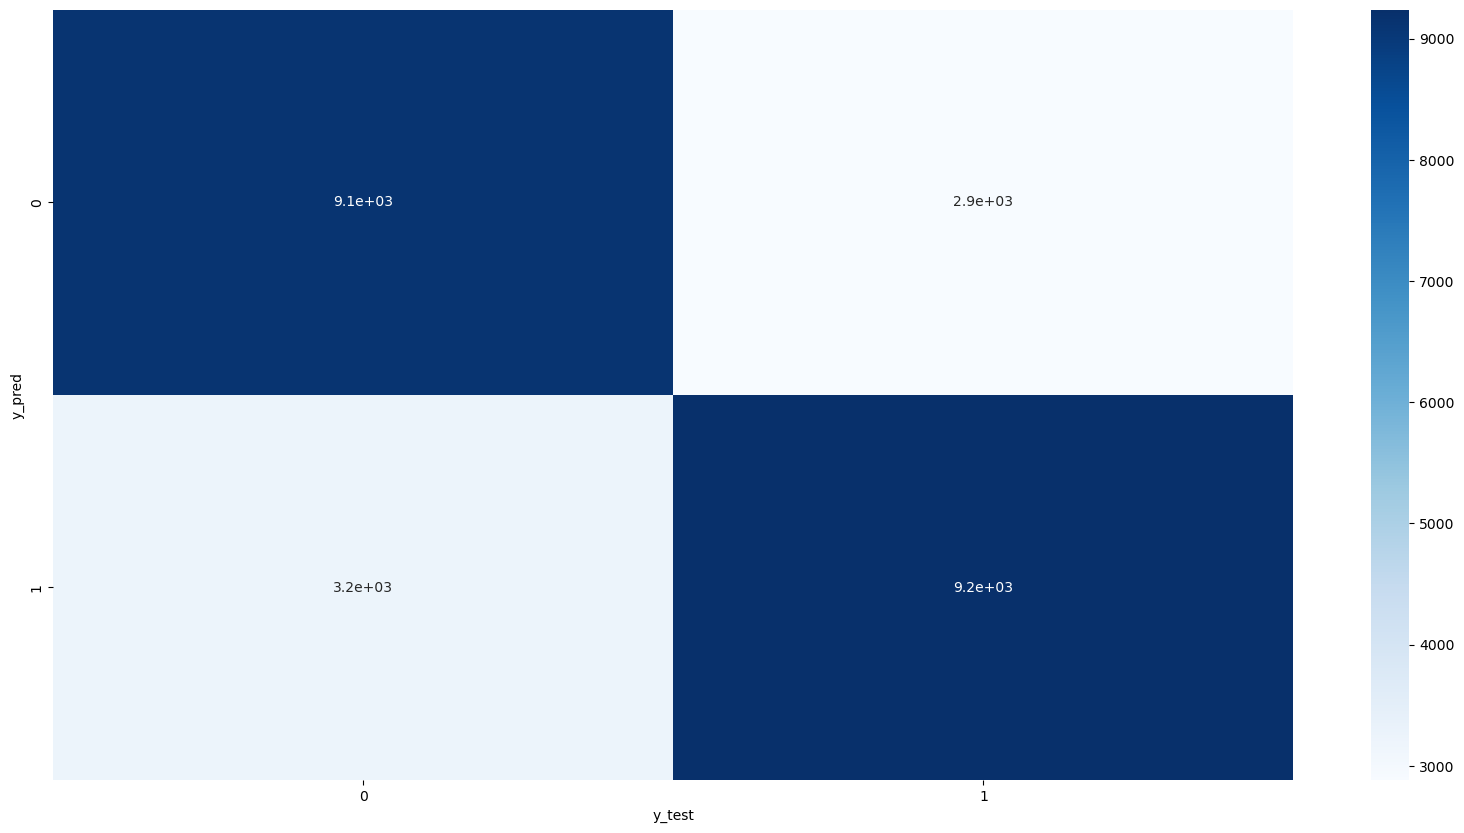

In [36]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()